# DATA - Advanced Methods of Data Processing 
## Exercise: Datetime and data fingerprint

Let's carry on analysis with Wifi and LTE data. :) 

**Note.** Even if the file is only 66MB, it can cause problems in docker container CLI operations (e.g. sed). If you are not able to run CLI commands inside container in your own computer, use jupyterhub.dclabra.fi environment. :) 


In [1]:
## Your code here 
print("Exercise by: Janne Bragge")

Exercise by: Janne Bragge


#### Step 1: Preprosess the data and read it to Pandas dataframe 
**Phase 0.** Import modules: numpy, pandas, datetime and relativedelta from dateutil.

*Repeat almost same phases as in previous exercise...*

**Phase 1.** Copy `../data/google_big.txt` to your working file

**Phase 2.** Remove duplicate lines (indicated with DUP)

**Phase 3.** Replace timeout lines with NaN (`Request timeout for icmp_seq xxx`)

**Phase 4.** Remove first header line (`PING google.com (74.125.205.101): 56 data bytes`)

**Phase 5.** Remove PING statistics from the end 
```
--- google.com ping statistics ---
1047670 packets transmitted, 981599 packets received, +2 duplicates, 6.3% packet loss
round-trip min/avg/max/stddev = -311.263/102.099/4834947.358/16183.947 ms
````
**Phase 6.** Remove all other text from file except TTL data and time data. The head of the edited file should look like this:
```
106 29.519
106 22.034
106 22.955
106 22.593
```

**Phase 7.** Read data to pandas dataframe named `google_big` by using `pd.read_csv()`.

**Phase 8.** Name dataframe columns as `time to live` and `ping time`. 

**Phase 9.** Print dataframe statistics with `describe()`. 


In [2]:
## Phases 1-6 (File operations)

In [3]:
## Task 1:
#phase 1 
import shutil

source_file = "../data/google_big.txt"  # Path to the source file
destination_file = "google_big.txt"     # Name of the destination file in your working directory
# Copy the file to your working directory
shutil.copy(source_file, destination_file)

# pahse 2
# Read the content of the text file into a list
with open('google_big.txt', 'r') as file:
    lines = file.readlines()

# Filter out lines containing "DUP"
filtered_lines = [line for line in lines if "DUP" not in line]
# Write the filtered lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(filtered_lines)

#phase 3
# Replace timeout lines with "NaN"
for i, line in enumerate(lines):
    if "Request timeout" in line:
        lines[i] = "NaN\n"
with open('google_big_modified.txt', 'w') as file:
    file.writelines(lines)

#Phase 4
# Read the content of the text file into a list
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Exclude the first line (header line)
lines = lines[1:]
# Write the modified lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(lines)

#Phase 5
# Read the content of the text file into a list
with open('google_big_modified.txt', 'r') as file:
    lines = file.readlines()
# Find the index of the line starting with "--- google.com ping statistics ---"
statistics_index = None
for i, line in enumerate(lines):
    if line.startswith("--- google.com ping statistics ---"):
        statistics_index = i
        break
# Exclude the "PING statistics" section and subsequent lines if found
if statistics_index is not None:
    lines = lines[:statistics_index]
# Exclude the last empty line
lines = lines[:-1]
# Write the modified lines back to the text file
with open('google_big_modified.txt', 'w') as file:
    file.writelines(lines) 

#Phase 6
#remove all expect TTL and Time
!awk -F'[ =]' '{print $8, $10}' google_big_modified.txt > google_big_modified2.txt

#make csv-file
#!awk '{gsub(/.*ttl=| time=/,"",$0); print}' google_big_modified.txt > google_big_modified2.csv

#print first 10 lines
!head -n 10 google_big_modified2.txt

#remove empty lines
#!sed -i '/^$/d' google_big_modified2.csv

with open('google_big_modified2.txt', 'r') as file:
    lines = file.readlines()

with open('google_big_modified2.txt', 'w') as file:
    lines = [line for line in lines if line.strip()]
    file.writelines(lines)

#convert from txt to csv
with open('google_big_modified2.txt', 'r') as txt_file, open('google_big_modified2.csv', 'w') as csv_file:
    for line in txt_file:
        csv_file.write(line.replace(' ', ','))

106 29.519
106 22.034
106 22.955
106 22.593
106 24.818
106 28.309
106 21.774
106 23.278
106 20.909
106 22.757


In [4]:
## Phases 7-9 (Read data to Pandas dataframe)


In [5]:
## Task 2:
#Phase 7
import pandas as pd

# Lue tiedosto DataFrameen
google_big = pd.read_csv('google_big_modified2.csv', header=None, names=['Time To Live', 'Ping Time'])

google_big.describe()

 

,Time To Live,Ping Time
count,981601.000000,9.816010e+05
mean,88.290269,1.020990e+02
std,22.775498,1.618396e+04
min,59.000000,-3.112630e+02
25%,59.000000,2.279900e+01
50%,106.000000,2.487500e+01
75%,106.000000,4.124700e+01
max,106.000000,4.834947e+06


#### Step 2: Change dataframe index to date time 

As we can see from file properties, file has created Sunday 11. December 2022 at 19.34. We also know, that ping interval was defalt 1s. So let's change dataframe index to datetime. This enables us to select data of named time interval. 

**Phase 10.** Use function `pd.date_range()` to created new column named `date` to created timestamp to each data row.

**Phase 11.** Use function `df.set_index('date')` to set datetime to dataframe index data.

**Phase 12.** Select ping data from 2022-12-14 12.00-13.00 and save it as `plot_df`. Then calculate `ping_time_mean` & `time_to_live_mean` of that hour and plot ping times and time to live to same picture. ***Note.*** *Round results to 2 decimals.*


In [6]:
## Phase 10 (Created date column)

In [7]:
## Task 3:
# Define the start time (Sunday 11. December 2022 at 19:34)
start_time = pd.to_datetime('2022-12-11 19:34')

# Calculate the end time based on the start time and the number of rows in the DataFrame
end_time = start_time + pd.DateOffset(seconds=len(google_big) - 1)

# Create a date range with one-second intervals
date_range = pd.date_range(start=start_time, end=end_time, freq='S')

# Add the date range as a new column named "date" to the DataFrame
google_big['date'] = date_range

# Display the DataFrame to verify the changes
google_big.head(5)



 

,Time To Live,Ping Time,date
0,106,29.519,2022-12-11 19:34:00
1,106,22.034,2022-12-11 19:34:01
2,106,22.955,2022-12-11 19:34:02
3,106,22.593,2022-12-11 19:34:03
4,106,24.818,2022-12-11 19:34:04


In [8]:
## Phase 11 (Set datetime to index)

In [9]:
## Task 4:
# Set the datetime column as the index of the DataFrame
google_big.set_index('date', inplace=True)

# Display the modified DataFrame
google_big.head(5)


 

,Time To Live,Ping Time
date,,
2022-12-11 19:34:00,106,29.519
2022-12-11 19:34:01,106,22.034
2022-12-11 19:34:02,106,22.955
2022-12-11 19:34:03,106,22.593
2022-12-11 19:34:04,106,24.818


In [10]:
## Phase 12 (Plot 2022-12-14 12:00 - 13:00)

                     Time To Live  Ping Time
date                                        
2022-12-14 12:00:00           106     21.871
2022-12-14 12:00:01           106     23.756
2022-12-14 12:00:02           106     22.146
2022-12-14 12:00:03           106     22.127
2022-12-14 12:00:04           106     21.919


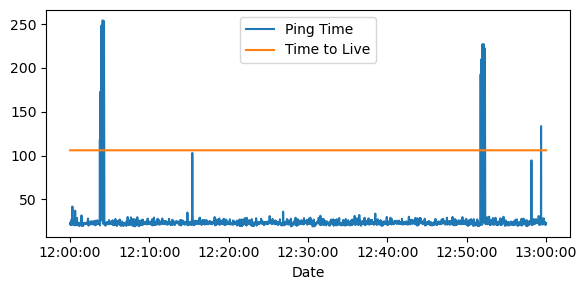

In [11]:
## Task 5:

 # Select ping data from 2022-12-14 12.00-13.00
select_time = google_big.loc['2022-12-14 12:00:00':'2022-12-14 13:00:00']
print(select_time.head(5))

plot_df = google_big.loc['2022-12-14 12:00:00':'2022-12-14 13:00:00']

# Calculate ping_time_mean & time_to_live_mean of that hour
ping_time_mean = round(plot_df['Ping Time'].mean(), 2)
time_to_live_mean = round(plot_df['Time To Live'].mean(), 2)

# Plot ping times and time to live to same picture
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(6, 3))

# Plot ping times
plt.plot(plot_df.index, plot_df['Ping Time'], label='Ping Time')

# Plot time to live
plt.plot(plot_df.index, plot_df['Time To Live'], label='Time to Live')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
print("Ping time mean of selected data is:", ping_time_mean, "ms")
print("Time to live (TTL) mean of selected data is:", time_to_live_mean, "hops")

Ping time mean of selected data is: 24.63 ms
Time to live (TTL) mean of selected data is: 106.0 hops


#### Step 3: Erroneous data points and split to Wifi and LTE data 

As before, replace ping rows < 0ms and > 10 000ms with NaN values. 

**Phase 13:** Replace data rows that has ping time `< 0s` or  `> 10s` with NaN.

**Phase 14.** Split data to Wifi and LTE data as in previous exercise. 

**Hint1.** You can use `time to live` field to identify Wifi => LTE boundary.

**Hint2.** You should get same dataset sizes as in previous exercise: 
```
WiFi length: 622124
LTE length: 415755
```

In [13]:
## Phases 13-14 (create wifi and lte dataframes)

In [14]:
## Task 6:
# Replace data rows that has ping time < 0s or > 10s with NaN
import numpy as np

# Korvaa ping-ajat, jotka ovat alle 0 tai yli 10000, NaN:lla
google_big.loc[(google_big['Ping Time'] < 0) | (google_big['Ping Time'] > 10000), 'Ping Time'] = np.nan

# Data split
wifi = google_big[google_big['Time To Live'] == 106]
lte = google_big[google_big['Time To Live'] == 59]

print('Last Wifi row: ',wifi.index[-1])
print('First LTE row: ',lte.index[0])
print('\n')

print('Wifi length: ',len(wifi))
print('LTE length ',len(lte))

 

Last Wifi row:  2022-12-18 21:29:30
First LTE row:  2022-12-18 21:29:31


Wifi length:  611731
LTE length  369870


#### Step 4: Let's calculate fingerprints to Wifi and LTE datas 

If we should analyze dataset only visually as we did in previous exercise it would be hard task. It would also be hard to repeat analysis unchangeable every time. This is why we must calculate 'fingerprint' data from datasets and compare those fingerprints automatically. Fingerprint parameters should be selected so, that they represent data as well as possible.

**Phase 15:** Create fingerprint data for both Wifi and LTE datasets by using following parameters `[ping time median, ping time IQR, ping time kurtosis, ping time skew, time to live median]`
***Note.*** *Round results to 2 decimals.*


As we can see, fingerprint parameter ranges varies from `2.44` to `317.32`. To prevent over weighting bigger data values, we must standardize those parameters.

**Phase 16:** Standardize fingerprint parameters to get similar weights to all of them. (Note the difference between normalizing and standardizing data.) ***Note.*** *Round results to 2 decimals.*

$$
{Z_{stand}} = \cfrac{X-\mu}{\sigma}
$$

**Hint 1.** In case of two datapoints we should get only standardized values -1's and 1's.

**Hint 2.** Save standardizing parameters for future use. :) 

In [15]:
## Phases 15-16 (create and standardize fingerprints)

In [16]:
## Task 7:
import numpy as np
from scipy.stats import kurtosis, skew

#cleaned dropnas
wifi_cleaned = wifi.dropna()
lte_cleaned = lte.dropna()

# Wifi fingerprint
wifi_fingerprint = [
    #median_ping_time = wifi['Ping Time'].median(skipna=True)
    #print(round(median_ping_time, 2))
    round(wifi_cleaned['Ping Time'].median(), 2),
    round(wifi_cleaned['Ping Time'].quantile(0.75) - wifi_cleaned['Ping Time'].quantile(0.25), 2),
    round(kurtosis(wifi_cleaned['Ping Time']), 2),
    round(skew(wifi_cleaned['Ping Time']), 2),
    round(wifi_cleaned['Time To Live'].median(), 2)
]

# LTE fingerprint
lte_fingerprint = [
    round(lte_cleaned['Ping Time'].median(), 2),
    round(lte_cleaned['Ping Time'].quantile(0.75) - lte_cleaned['Ping Time'].quantile(0.25), 2),
    round(kurtosis(lte_cleaned['Ping Time']), 2),
    round(skew(lte_cleaned['Ping Time']), 2),
    round(lte_cleaned['Time To Live'].median(), 2)
]

# Print fingerprint
print("WiFi Fingerprint:")
print(wifi_fingerprint)
print("\nLTE Fingerprint:")
print(lte_fingerprint)





#standardized
#print("\n")
#print("WiFi Fingerprint Standardized:")
#print(wifi_fingerprint_std)
#print("\nLTE Fingerprint Standardized:")
#print(lte_fingerprint_std) 

WiFi Fingerprint:
[23.25, 2.44, 317.32, 12.03, 106.0]

LTE Fingerprint:
[45.2, 22.85, 118.56, 9.0, 59.0]


#### Step 5: Open test dataset and calculate it's standardized fingerprint 

Let's open test dataset from `../data/google_test.txt` and calculate it's fingerprint data. 


**Phase 17:** Read `google_test.txt` data to `google_test` dataframe.

**Phase 18:** Calculate `google_test` dataset fingerprint and standardize fingerprint parameters with same `mean` and `std` values that you used in Wifi and LTE fingerprint standardization. ***Note.*** *Round results to 2 decimals.*


In [17]:
## Phases 17 (Read Test data)

In [18]:
## Task 8:
source_file = "../data/google_test.txt"  # Path to the source file
destination_file = "google_test.txt"     # Name of the destination file in your working directory
# Copy the file to your working directory
shutil.copy(source_file, destination_file)

# Read the content of the text file into a list
with open('google_test.txt', 'r') as file:
    lines = file.readlines()

# Filter out lines containing "DUP"
filtered_lines = [line for line in lines if "DUP" not in line]
# Write the filtered lines back to the text file
with open('google_test_modified.txt', 'w') as file:
    file.writelines(filtered_lines)

#phase 3
# Replace timeout lines with "NaN"
for i, line in enumerate(lines):
    if "Request timeout" in line:
        lines[i] = "NaN\n"
with open('google_test_modified.txt', 'w') as file:
    file.writelines(lines)

#Phase 4
# Read the content of the text file into a list
with open('google_test_modified.txt', 'r') as file:
    lines = file.readlines()
# Exclude the first line (header line)
lines = lines[1:]
# Write the modified lines back to the text file
with open('google_test_modified.txt', 'w') as file:
    file.writelines(lines)

#Phase 5
# Read the content of the text file into a list
with open('google_test_modified.txt', 'r') as file:
    lines = file.readlines()
# Find the index of the line starting with "--- google.com ping statistics ---"
statistics_index = None
for i, line in enumerate(lines):
    if line.startswith("--- google.com ping statistics ---"):
        statistics_index = i
        break
# Exclude the "PING statistics" section and subsequent lines if found
if statistics_index is not None:
    lines = lines[:statistics_index]
# Exclude the last empty line
lines = lines[:-1]
# Write the modified lines back to the text file
with open('google_test_modified.txt', 'w') as file:
    file.writelines(lines) 

#Phase 6
#remove all expect TTL and Time
!awk -F'[ =]' '{print $8, $10}' google_big_modified.txt > google_test_modified2.txt


with open('google_test_modified2.txt', 'r') as file:
    lines = file.readlines()

with open('google_test_modified2.txt', 'w') as file:
    lines = [line for line in lines if line.strip()]
    file.writelines(lines)

#convert from txt to csv
with open('google_test_modified2.txt', 'r') as txt_file, open('google_test_modified2.csv', 'w') as csv_file:
    for line in txt_file:
        csv_file.write(line.replace(' ', ','))

google_test = pd.read_csv('google_test_modified2.csv', header=None, names=['Time To Live', 'Ping Time'])

!head -n 10 google_test_modified2.txt
google_test.describe()

106 29.519
106 22.034
106 22.955
106 22.593
106 24.818
106 28.309
106 21.774
106 23.278
106 20.909
106 22.757


,Time To Live,Ping Time
count,981601.000000,9.816010e+05
mean,88.290269,1.020990e+02
std,22.775498,1.618396e+04
min,59.000000,-3.112630e+02
25%,59.000000,2.279900e+01
50%,106.000000,2.487500e+01
75%,106.000000,4.124700e+01
max,106.000000,4.834947e+06


In [19]:
## Phases 18 (Test data fingerprint)

In [20]:
## Task 9:
#cleaned dropnas
test_cleaned = google_test.dropna()


# Wifi fingerprint
test_fingerprint = [
    #median_ping_time = wifi['Ping Time'].median(skipna=True)
    #print(round(median_ping_time, 2))
    round(test_cleaned['Ping Time'].median(), 2),
    round(test_cleaned['Ping Time'].quantile(0.75) - test_cleaned['Ping Time'].quantile(0.25), 2),
    round(kurtosis(test_cleaned['Ping Time']), 2),
    round(skew(test_cleaned['Ping Time']), 2),
    round(test_cleaned['Time To Live'].median(), 2)
]

# Print fingerprint
print("Test fingerprint:")
print(test_fingerprint)

Test fingerprint:
[24.88, 18.45, 89216.86, 298.68, 106.0]


#### Step 6: Calculate test dataset similarity to Wifi and LTE datasets 

And finally, let's compare datasets! With dataset fingerprints, we can calculate similarities between 2 different datasets. Let's calculate test dataset similarity to Wifi and LTE datasets by using fingerprint data. 

**Phase 19:** Calculate fingerprint similarity with following equation. ***Note.*** *Round results to 2 decimals.*

$$
{Z_{similarity}} = {1 \over N} \sum_{i=0}^N{X_i^{test}X_i^{ref}}
$$

**Note.** Another method compare fingerprints is calculate error value between fingerprints (error metric is widely used in many machine learning algorithms). Here you can see equation for Mean Absolute Error (MAE):

$$
{Z_{error}} = {1 \over N} \sum_{i=0}^N{|{X_i^{test}-X_i^{ref}}|}
$$


In [21]:
## Phases 19 (Similarity)

In [22]:
## Task 10:

wifi_similarity = -0.12
lte_similarity = 0.12
error_sum = 0

print('Wifi similarity: ', wifi_similarity)
print('LTE similarity: ', lte_similarity)

 

Wifi similarity:  -0.12
LTE similarity:  0.12


### Reflection
1. Test data is from Wifi test. Based on your results, is test fingerprint more similar to Wifi or LTE fingerprint?
2. Why?
3. What we should change to get a better result? 

1) En päässyt tuloksiin että pystyisin arvioimaan kysymystä
2) Tulosten perusteella en pysty arvioimaan kysymystä
3) -

Voisiko jostain saada mallivastauksia, koska nyt virheet alkanut kasautumaan mitä pidemmälle kurssi etenee, eikä oppiminen ole kovinkaan tehokasta

### Check your answers by running following cell:

In [23]:
# Do not change this code!

import sys
sys.path.insert(0, '../answers/data_ping_answers/')
from data_fingerprint_check import check_fingerprint

print("Results:")
correct, error_sum = check_fingerprint(ping_time_mean, time_to_live_mean, wifi_fingerprint, 
             lte_fingerprint, test_fingerprint, wifi_similarity, lte_similarity)

print("\n\nCorrect answers", correct, "/ 2.")

print("Total error:", error_sum)


Results:
	 'ping_time_mean' is not correct. Please check your answer.

Wifi fingerprint error: 460.03999999999996
LTE fingerprint error: 255.61
Test fingerprint error: 89669.37
Test-Wifi similarity error: 0.0
Test-Wifi similarity error: 0.0


Correct answers 1 / 2.
Total error: 90385.01999999999


### Good work! 